To prepare This notebooks, I have taken reference from https://www.javatpoint.com/machine-learning. You can visit this to learn machine learing concets.

# Problem statement:
We have dataset with two features i.e. **Experience** and **Salary**
The goal of this problem is:

* To find out correlation between these two variable.
* To find best fit line for the dataset.
* How the depedent variable is changing by changing the indepndent variable.

## Importing libraries

In [1]:
# For Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Import data
This dataset I've taken from **Kaggle** platform. You can find it here: https://www.kaggle.com/datasets/root64shivansh/profit-in-startup-of-a-company

In [2]:
dataset = pd.read_csv("Salary.csv")
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Data Preprocessing and Visualization

In [3]:
# shape()
dataset.shape

(35, 2)

In [4]:
# Head()
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# Null value count
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

We have no missing data, we are ready to processed further,

In [6]:
dataset.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [7]:
dataset.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Text(0, 0.5, 'Salary')

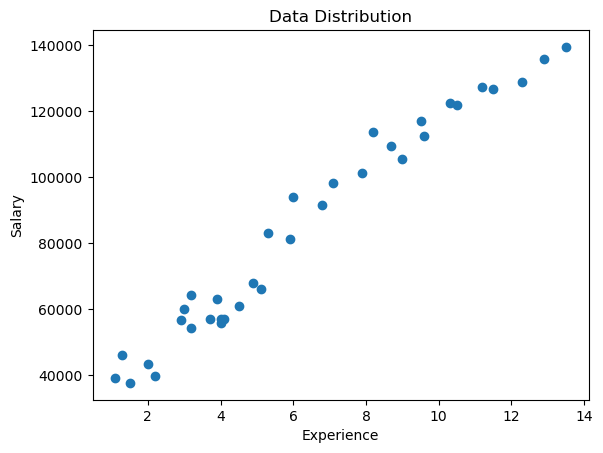

In [8]:
plt.scatter(dataset["YearsExperience"],dataset["Salary"])
plt.title("Data Distribution")
plt.xlabel("Experience")
plt.ylabel("Salary")

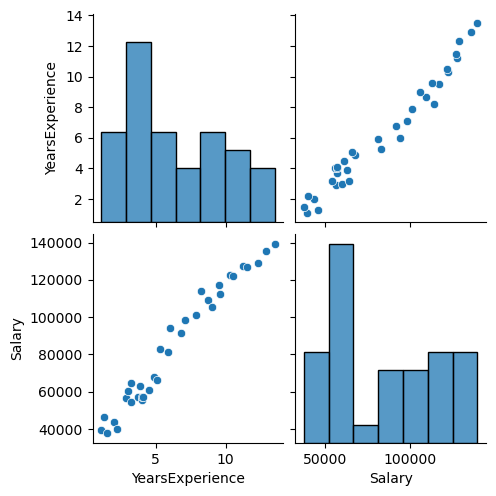

In [9]:
sns.pairplot(dataset)

## Spliting data

In [10]:
x = pd.DataFrame(dataset["YearsExperience"])
y = pd.DataFrame(dataset["Salary"])

In [11]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [12]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


## Split data into train and test set

We will split both variables into the test set and training set. We have 35 observations, so we will take 23 observations for the training set and 12 observations for the test set. We are splitting our dataset so that we can train our model using a training dataset and then test the model using a test dataset.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((23, 1), (12, 1), (23, 1), (12, 1))

For simple linear Regression, `we will not use Feature Scaling`. Because Python libraries take care of it for some cases, so we don't need to perform it here. Now, our dataset is well prepared to work on it and we are going to start building a Simple Linear Regression model for the given problem.

## Training model

We will import the `LinearRegression` class of the `linear_model` library from the `scikit learn`. After importing the class, we are going to create an object of the class named as a model. The code for this is given below:

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

We have used a **fit()** method to fit our Simple Linear Regression object to the training set. In the fit() function, we have passed the x_train and y_train, which is our training dataset for the dependent and an independent variable. We have fitted our `model` object to the training set so that the model can easily learn the correlations between the predictor and target variables

## Prediction of test result

Here `dependent (salary)` and an `independent variable (Experience)`. So, now, our model is ready to predict the output for the new observations. In this step, we will provide the test dataset (new observations) to the model to check whether it can predict the correct output or not.

We will create a prediction vector y_pred, and x_pred, which will contain predictions of test dataset, and prediction of training set respectively.


In [17]:
#Prediction of Test and Training set result  
y_pred= model.predict(x_test)  
x_pred= model.predict(x_train)  

## Visualizing Training set.

* We will use the **scatter()** function of the pyplot library, which we have already imported in the pre-processing step. The scatter () function will create a scatter plot of observations.

* In the `x-axis`, we will plot the `Years of Experience of employees`. 

* on the `y-axis`, we will plot the `salary of employees`.

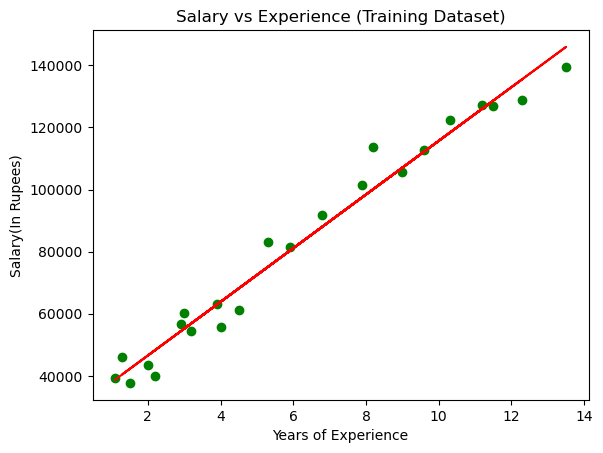

In [18]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

* In the above plot, we can see the real values observations in green dots and predicted values are covered by the red regression line. The regression line shows a correlation between the dependent and independent variable.

* The good fit of the line can be observed by calculating the difference between actual values and predicted values. But as we can see in the above **plot, most of the observations are close to the regression line, hence our model is good for the training set.**

## visualizing the Test set results:

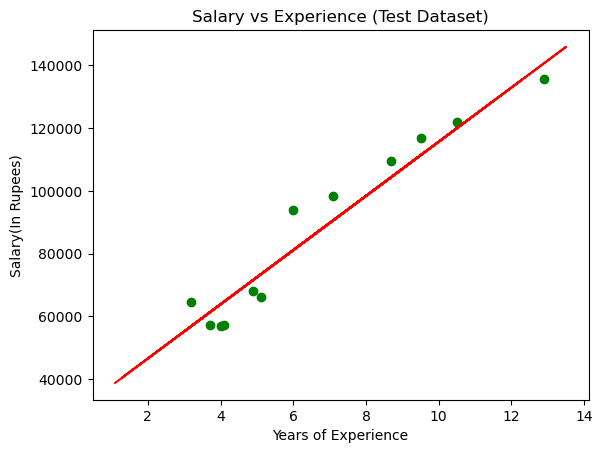

In [19]:
plt.scatter(x_test, y_test, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

## Evaluating Model

### 1. R2 Score

* R-squared is a statistical method that determines the goodness of fit.
* It measures the strength of the relationship between the dependent and independent variables on a scale of 0-100%.
* The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model

In [20]:
r2_score(y_test,y_pred)

0.9395437650018967

### 2. Mean Absolute Error
* The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
* The low value of Mean Absolute Error determines the less difference between the predicted values and actual values and hence represents a good model.

In [21]:
mean_absolute_error(y_test,y_pred)

6254.425890647657

### 3. Mean squared Error

* The mean squared error of an estimator measures the average of the squares of the errors that is, the average squared difference between the estimated values and the actual value
* The low value of Mean squared Error determines the less difference between the predicted values and actual values and hence represents a good model

In [22]:
mean_squared_error(y_test,y_pred)

46147614.51999699

## Conclusion:

* In the above plot, there are observations given by the blue color, and prediction is given by the red regression line. As we can see, most of the observations are close to the regression line, hence we can say our Simple Linear Regression is a good model and able to make good predictions.

### Thank you for reading.